In [33]:
# Machine Learning 
# HW3
# Shanle Yao
# 800962310
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap

In [34]:
breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
#breast_dataset['label'].replace(0,'Benign',inplace=True)
#breast_dataset['label'].replace(1,'Malignant',inplace=True)

## Q1

In [35]:
X = breast_dataset.loc[:, 'mean radius':'worst fractal dimension'] 
Y = breast_dataset.loc[:, 'label'] 

In [36]:
def initialize(m):
    w = np.zeros((m,1))
    b = 0
    return w , b

In [37]:
def sigmoid(X):
    return 1/(1 + np.exp(- X))    

In [38]:
def propogate(X, Y, w, b):
    
    m = X.shape[1] #Number of training examples
    #Forward Propogation, calculating the cost
    Z = np.dot(w.T, X) + b;    
    A = sigmoid(Z)
    cost= -(1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    #Back Propogation , calculating the gradients
    dw = (1/m)* np.dot(X, (A-Y).T)
    db = (1/m)* np.sum(A-Y)
    grads= {"dw" : dw, "db" : db}
    return grads, cost

In [39]:
def optimize(X, Y, w, b, num_of_iterations, alpha):
    costs=[] 
    for i in range(num_of_iterations):
        grads, cost = propogate(X, Y, w, b)
        dw = grads["dw"]
        db = grads["db"]
        w = w - alpha * dw
        b = b - alpha * db
        #Storing tthe cost at interval of every 10 iterations
        if i% 10 == 0:
            costs.append(cost)
            print("cost after %i iteration : %f" % (i, cost))        
    parameters = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
    return parameters, grads, costs

In [40]:
def predict(X, w, b):
    m = X.shape[1] #Number of training examples
    y_prediction =  np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A=sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        if(A[0,i]<0.5):
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
    return y_prediction

In [41]:
def model(Xtrain, Ytrain, num_of_iterations, alpha):
    dim = Xtrain.shape[0] #Number of features
    w,b = initialize(dim)
    parameters, grads, costs = optimize(Xtrain, Ytrain, w, b, num_of_iterations, alpha) 
    w = parameters["w"]
    b = parameters["b"]
    d={"w":w, "b":b, "costs": costs}
    return d

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

In [43]:
X_train=np.asarray(X_train)
Y_train=np.asarray(Y_train)
X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)

In [44]:
d= model(X_train.T, Y_train.T, num_of_iterations=10000, alpha=0.000001)
      
loss=d["costs"]
w=d["w"]
b=d["b"]

cost after 0 iteration : 0.693147
cost after 10 iteration : 0.672732
cost after 20 iteration : 0.665907
cost after 30 iteration : 0.659398
cost after 40 iteration : 0.653179
cost after 50 iteration : 0.647229
cost after 60 iteration : 0.641530
cost after 70 iteration : 0.636062
cost after 80 iteration : 0.630810
cost after 90 iteration : 0.625758
cost after 100 iteration : 0.620893
cost after 110 iteration : 0.616203
cost after 120 iteration : 0.611676
cost after 130 iteration : 0.607302
cost after 140 iteration : 0.603072
cost after 150 iteration : 0.598977
cost after 160 iteration : 0.595010
cost after 170 iteration : 0.591162
cost after 180 iteration : 0.587427
cost after 190 iteration : 0.583800
cost after 200 iteration : 0.580274
cost after 210 iteration : 0.576845
cost after 220 iteration : 0.573507
cost after 230 iteration : 0.570257
cost after 240 iteration : 0.567089
cost after 250 iteration : 0.564000
cost after 260 iteration : 0.560987
cost after 270 iteration : 0.558046
cos

cost after 3870 iteration : 0.311772
cost after 3880 iteration : 0.311562
cost after 3890 iteration : 0.311352
cost after 3900 iteration : 0.311143
cost after 3910 iteration : 0.310935
cost after 3920 iteration : 0.310728
cost after 3930 iteration : 0.310521
cost after 3940 iteration : 0.310315
cost after 3950 iteration : 0.310110
cost after 3960 iteration : 0.309905
cost after 3970 iteration : 0.309701
cost after 3980 iteration : 0.309498
cost after 3990 iteration : 0.309296
cost after 4000 iteration : 0.309094
cost after 4010 iteration : 0.308893
cost after 4020 iteration : 0.308693
cost after 4030 iteration : 0.308493
cost after 4040 iteration : 0.308294
cost after 4050 iteration : 0.308096
cost after 4060 iteration : 0.307898
cost after 4070 iteration : 0.307701
cost after 4080 iteration : 0.307505
cost after 4090 iteration : 0.307309
cost after 4100 iteration : 0.307114
cost after 4110 iteration : 0.306920
cost after 4120 iteration : 0.306726
cost after 4130 iteration : 0.306533
c

cost after 8280 iteration : 0.259753
cost after 8290 iteration : 0.259687
cost after 8300 iteration : 0.259621
cost after 8310 iteration : 0.259555
cost after 8320 iteration : 0.259490
cost after 8330 iteration : 0.259424
cost after 8340 iteration : 0.259359
cost after 8350 iteration : 0.259294
cost after 8360 iteration : 0.259229
cost after 8370 iteration : 0.259164
cost after 8380 iteration : 0.259099
cost after 8390 iteration : 0.259034
cost after 8400 iteration : 0.258970
cost after 8410 iteration : 0.258905
cost after 8420 iteration : 0.258841
cost after 8430 iteration : 0.258777
cost after 8440 iteration : 0.258713
cost after 8450 iteration : 0.258649
cost after 8460 iteration : 0.258585
cost after 8470 iteration : 0.258522
cost after 8480 iteration : 0.258458
cost after 8490 iteration : 0.258395
cost after 8500 iteration : 0.258331
cost after 8510 iteration : 0.258268
cost after 8520 iteration : 0.258205
cost after 8530 iteration : 0.258142
cost after 8540 iteration : 0.258079
c

Text(0, 0.5, 'Loss')

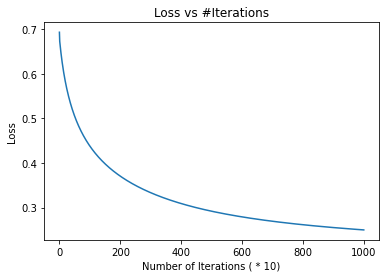

In [45]:
plt.plot(loss)
plt.title("Loss vs #Iterations")
plt.xlabel("Number of Iterations ( * 10)")
plt.ylabel("Loss")

In [46]:
Y_prediction_train = predict(X_train.T, w, b)
Y_prediction_test = predict(X_test.T, w, b)

In [47]:
print("\nTrain accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train.T)) * 100))
print("\nTest accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test.T)) * 100))


Train accuracy: 92.08791208791209 %

Test accuracy: 91.2280701754386 %


## Q2

([<matplotlib.axis.XTick at 0x7fd778037df0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20')])

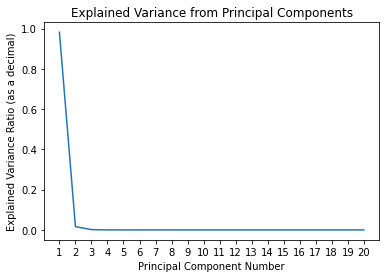

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X_train)
X_train_PCA = pca.fit_transform(X_train)

# plot explained variance ratio and number of PC's (scree plot)
plt.figure()
plt.plot(range(0, pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance Ratio (as a decimal)")
plt.title("Explained Variance from Principal Components")
plt.xticks(np.arange(pca.n_components_), range(1, pca.n_components_ + 1))

Text(0.5, 1.0, 'Principal Component Analysis')

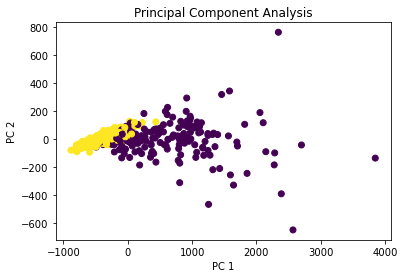

In [49]:
plt.figure()
scatter = plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1], c=Y_train.values)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Principal Component Analysis")

In [58]:
for i in range(1, 10):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train_pca,Y_train)
    Y_pred = classifier.predict(X_test_pca)
    
    cnf_matrix = confusion_matrix(Y_test, Y_pred)
    print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
    print("Precision:",metrics.precision_score(Y_test,Y_pred))
    print("Recall:",metrics.recall_score(Y_test,Y_pred))       

Accuracy: 0.8859649122807017
Precision: 0.8554216867469879
Recall: 0.9861111111111112
Accuracy: 0.9298245614035088
Precision: 0.9210526315789473
Recall: 0.9722222222222222
Accuracy: 0.9298245614035088
Precision: 0.9210526315789473
Recall: 0.9722222222222222
Accuracy: 0.9385964912280702
Precision: 0.922077922077922
Recall: 0.9861111111111112
Accuracy: 0.9298245614035088
Precision: 0.9210526315789473
Recall: 0.9722222222222222
Accuracy: 0.9298245614035088
Precision: 0.9210526315789473
Recall: 0.9722222222222222
Accuracy: 0.9473684210526315
Precision: 0.9342105263157895
Recall: 0.9861111111111112
Accuracy: 0.9385964912280702
Precision: 0.922077922077922
Recall: 0.9861111111111112
Accuracy: 0.9385964912280702
Precision: 0.922077922077922
Recall: 0.9861111111111112


/Users/eyao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eyao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

## Q3

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score 

In [68]:
for i in range(1, 2):
    lda = LinearDiscriminantAnalysis(n_components = i)
    lda_t = lda.fit_transform(X,Y)
    
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)
    lda.fit(X_train,Y_train) 
    Y_pred = lda.predict(X_test) 
    
    cnf_matrix = confusion_matrix(Y_test, Y_pred)
    print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
    print("Precision:",metrics.precision_score(Y_test,Y_pred))
    print("Recall:",metrics.recall_score(Y_test,Y_pred))  

Accuracy: 0.9473684210526315
Precision: 0.9230769230769231
Recall: 1.0


## Q4

In [70]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda_t = lda.fit_transform(X,Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
    
cnf_matrix = confusion_matrix(Y_test, Y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred)) 

Accuracy: 0.9473684210526315
Precision: 0.9459459459459459
Recall: 0.9722222222222222


/Users/eyao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
